# Prerequisites

In [88]:
import time
time_start = time.time()

In [89]:
#!pip install pandas numpy matplotlib seaborn sklearn

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Importing the data

In [91]:
#Open blinks data from csv

#Make a filename that is a relative path to the data
filename = '../../Data/blinks.txt'

data = pd.read_csv(filename, sep=",", header=None)

In [92]:
#Removing columns 12-22
data = data.drop(data.columns[12:22], axis=1)
#Remove the first 1000 samples
data = data.drop(data.index[0:1000])
#Reindex the data
data = data.reset_index(drop=True)
data

,0,1,2,3,4,5,6,7,8,9,10,11,22,23
0,232,65204.73,51338.89,-15532.88,-21018.39,6220.27,-3776.89,6869.58,1464.67,0.038,0.770,0.604,1557936057322,12:00:57.322
1,233,64880.61,50822.25,-15317.76,-20962.36,6507.96,-3452.81,7167.31,1747.48,0.030,0.776,0.612,1557936057328,12:00:57.328
2,234,64431.11,50216.86,-15067.89,-20703.97,6782.68,-3201.98,7451.71,2030.59,0.030,0.776,0.612,1557936057328,12:00:57.328
3,235,64745.36,50724.85,-15302.41,-20786.18,6471.43,-3542.17,7128.49,1724.59,0.030,0.776,0.612,1557936057336,12:00:57.336
4,236,65189.55,51327.16,-15519.71,-20994.57,6219.91,-3786.32,6864.22,1460.75,0.030,0.776,0.612,1557936057336,12:00:57.336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21485,213,58750.42,47034.95,-18637.04,-27128.40,-9182.90,-18376.35,-5918.16,-6498.79,0.034,0.762,0.610,1557936143152,12:02:23.152
21486,214,59029.14,47391.53,-18737.73,-27217.09,-9327.85,-18544.50,-6069.39,-6654.94,0.028,0.768,0.614,1557936143152,12:02:23.152
21487,215,58890.72,47196.80,-18850.75,-27389.65,-9400.32,-18621.62,-6141.32,-6739.32,0.028,0.768,0.614,1557936143159,12:02:23.159
21488,216,58567.63,46769.70,-18777.12,-27361.26,-9255.01,-18427.36,-5976.43,-6570.79,0.028,0.768,0.614,1557936143166,12:02:23.166


0        14.686
1        14.762
2        14.762
3        14.762
4        14.762
          ...  
21485    14.636
21486    14.686
21487    14.686
21488    14.686
21489    14.686
Length: 21490, dtype: float64


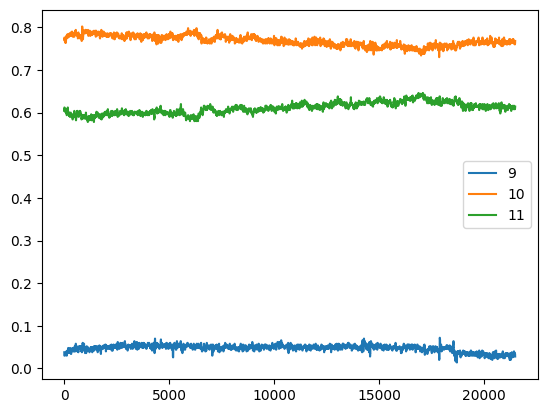

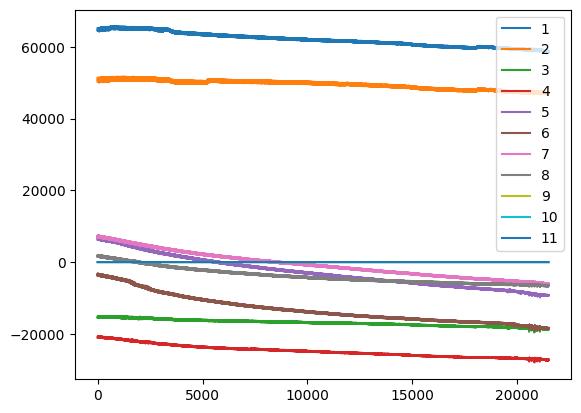

In [93]:
#Create a dataframe for the data, columns 1-11
useful_data = data.iloc[:,1:12]

#Create alpha labels, columns 9-11
alphaLabels = data.iloc[:,9:12]

#Create a 1d dataframe of the alphas summed
alphaSum = alphaLabels.mul([9,10,11]).sum(axis=1)

#Plot alpha labels
alphaLabels.plot()

#Ploting the data
useful_data.plot()

print(alphaSum)

In [94]:
n_samps = 21490
n_blinks = 40
lenRangeDown = 30
lenRangeUp = 60
labels = pd.DataFrame()

#Append 21491 norm labels to the dataframe
for i in range(n_samps):
    labels = labels._append(['norm'])

#Generate random blink labels
for _ in range(n_blinks):
    # Randomly select the start and end indices for each blink
    start_idx = random.randint(0, n_samps - lenRangeUp)
    end_idx = start_idx + random.randint(lenRangeDown, lenRangeUp)
    
    # Set the blink labels for the selected range
    for i in range(start_idx, end_idx):
        labels.iloc[i] = 'blink'

labels.value_counts()

norm     19671
blink     1819
Name: count, dtype: int64

# Support Vector Classifier (SVC)

In [95]:
#SVC

#Split 20% of the data for testing in both tr_data and labels
tr_dataSVC, te_dataSVC, tr_labelsSVC, te_labelsSVC = train_test_split(useful_data, labels, test_size=0.2, random_state=42)

#Create a grid of kernels, C values, degree, and gamma values
param_gridSVC = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
#Create a grid search using the SVC classifier and the grid of parameters
gridSVC = GridSearchCV(SVC(random_state=0), param_gridSVC, cv = 4, verbose=0, n_jobs=-1)
#Fit the grid search to the data
gridSVC.fit(tr_dataSVC, tr_labelsSVC)
#Print and store the best parameters, for finding testing error
print(gridSVC.best_params_)
best_paramsSVC = gridSVC.best_params_
#Print and store the best estimator, for finding testing error
print(gridSVC.best_estimator_)
#Print the scores
print(gridSVC.cv_results_['mean_test_score'])

/home/ryan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ryan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ryan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ryan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

{'C': 0.0001, 'kernel': 'linear'}
SVC(C=0.0001, kernel='linear', random_state=0)
[0.91397161 0.91397161 0.91397161 0.91397161 0.91397161 0.91397161
 0.91397161 0.91397161 0.91397161 0.91397161 0.91397161 0.91397161
 0.91397161 0.91397161 0.91397161 0.91397161 0.91397161 0.91397161
 0.91397161 0.91397161 0.91397161 0.91397161 0.91397161 0.91397161
 0.91397161 0.91397161 0.91397161 0.8748255  0.91397161 0.91397161
 0.91397161 0.84614937]


In [96]:
#Use the best parameters and estimator to predict the testing data, and print the accuracy
pred_svc = gridSVC.predict(te_dataSVC)
print(gridSVC.score(te_dataSVC, te_labelsSVC))

0.9208934388087483


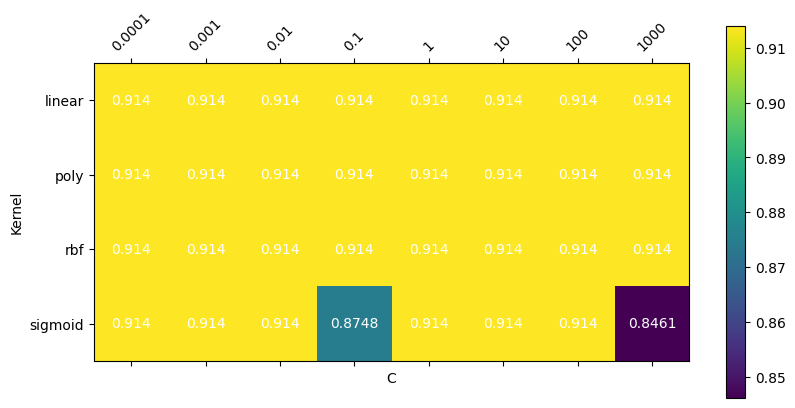

In [97]:
#Plot the score for each parameter combination
scoresSVC = gridSVC.cv_results_['mean_test_score'].reshape(len(param_gridSVC['kernel']), len(param_gridSVC['C']))
plt.matshow(scoresSVC)
plt.xlabel('C')
plt.ylabel('Kernel')
plt.colorbar()
plt.xticks(np.arange(len(param_gridSVC['C'])), param_gridSVC['C'], rotation=45)
plt.yticks(np.arange(len(param_gridSVC['kernel'])), param_gridSVC['kernel'])
#Round all scores to 4 decimal places
scoresSVC = np.around(scoresSVC, decimals=4)
#Display score on each square
for i in range(len(param_gridSVC['kernel'])):
    for j in range(len(param_gridSVC['C'])):        
        plt.text(j, i, scoresSVC[i, j], ha='center', va='center', color='white')
plt.show()

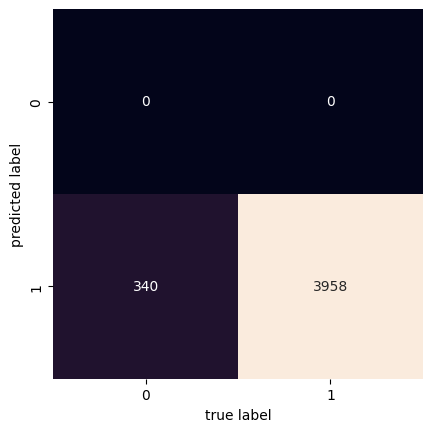

In [98]:
#Plot the confusion matrix
matSVC = confusion_matrix(te_labelsSVC, pred_svc)
sns.heatmap(matSVC.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

# Linear Discriminant Analysis (LDA)

In [99]:
#LDA

#Split 20% of the data for testing in both tr_data and labels
tr_dataLDA, te_dataLDA, tr_labelsLDA, te_labelsLDA = train_test_split(useful_data, labels, test_size=0.2, random_state=42)

#Create a grid of solvers, shrinkage values, and priors
#param_grid = {'solver': ['svd', 'lsqr', 'eigen'], 'shrinkage': [None, 'auto'], 'priors': [None, [0.5, 0.5]]}
#Only 28 of 48 valid, create a grid of only the valid parameters
param_gridLDA = {'solver': ['svd', 'lsqr', 'eigen'], 'priors': [None, [0.5, 0.5]]}
#Create a grid search using the LDA classifier and the grid of parameters
gridLDA = GridSearchCV(LinearDiscriminantAnalysis(), param_gridLDA, cv = 4)
#Fit the grid search to the data
gridLDA.fit(tr_dataLDA, tr_labelsLDA)
#Print and store the best parameters, for finding testing error
print(gridLDA.best_params_)
best_paramsLDA = gridLDA.best_params_
#Print and store the best estimator, for finding testing error
print(gridLDA.best_estimator_)
#Print the scores
print(gridLDA.cv_results_['mean_test_score'])

/home/ryan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ryan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ryan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ryan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

{'priors': None, 'solver': 'svd'}
LinearDiscriminantAnalysis()
[0.91397161 0.91397161 0.91397161 0.58655188 0.53030479 0.53030479]


/home/ryan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ryan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ryan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
#Use the best parameters and estimator to predict the testing data, and print the accuracy
pred_lda = gridLDA.predict(te_dataLDA)
print(gridLDA.score(te_dataLDA, te_labelsLDA))

0.9208934388087483


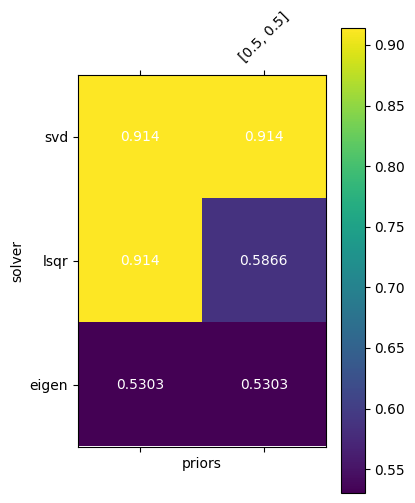

In [101]:
#Plot the score for each parameter combination
scoresLDA = gridLDA.cv_results_['mean_test_score'].reshape(len(param_gridLDA['solver']), len(param_gridLDA['priors']))
plt.matshow(scoresLDA)
plt.xlabel('priors')
plt.ylabel('solver')
plt.colorbar()
plt.xticks(np.arange(len(param_gridLDA['priors'])), param_gridLDA['priors'], rotation=45)
plt.yticks(np.arange(len(param_gridLDA['solver'])), param_gridLDA['solver'])
#Round all scores to 4 decimal places
scoresLDA = np.around(scoresLDA, decimals=4)
#Display score on each square
for i in range(len(param_gridLDA['solver'])):
    for j in range(len(param_gridLDA['priors'])):        
        plt.text(j, i, scoresLDA[i, j], ha='center', va='center', color='white')
plt.show()


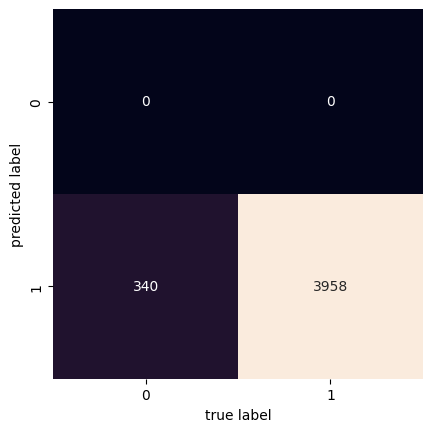

In [102]:
#Plot the confusion matrix
matLDA = confusion_matrix(te_labelsLDA, pred_lda)
sns.heatmap(matLDA.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

# Random Forest Classifier (RFC)

In [103]:
#RandomForestClassifier

#Split 20% of the data for testing in both tr_data and labels
tr_dataRFC, te_dataRFC, tr_labelsRFC, te_labelsRFC = train_test_split(useful_data, labels, test_size=0.2, random_state=42)

#Create a grid of n_estimators, max_depth, and max_features
#param_grid = {'n_estimators': [10, 100, 1000], 'max_depth': [None, 5, 10], 'max_features': ['auto', 'sqrt', 'log2']}
#Only 36 of 108 valid, create a grid of only the valid parameters
param_gridRFC = {'n_estimators': [10, 100, 500, 1000], 'max_depth': [None, 5, 10, 50]}
#Create a grid search using the RandomForestRegressor classifier and the grid of parameters
gridRFC = GridSearchCV(RandomForestClassifier(random_state=0), param_gridRFC, cv = 4, verbose=0, n_jobs=-1)
#Fit the grid search to the data
gridRFC.fit(tr_dataRFC, tr_labelsRFC)
#Print and store the best parameters, for finding testing error
print(gridRFC.best_params_)
best_paramsRFC = gridRFC.best_params_
#Print and store the best estimator, for finding testing error
print(gridRFC.best_estimator_)
#Print the scores
print(gridRFC.cv_results_['mean_test_score'])

/home/ryan/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/ryan/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/ryan/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/ryan/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

{'max_depth': None, 'n_estimators': 100}
RandomForestClassifier(random_state=0)
[0.93752908 0.94037925 0.93979758 0.93921591 0.91496045 0.91437878
 0.91414611 0.91420428 0.9244416  0.92403443 0.92368544 0.92351094
 0.93752908 0.94037925 0.93979758 0.93921591]


In [104]:
#Use the best parameters and estimator to predict the testing data, and print the accuracy
pred_rfc = gridRFC.predict(te_dataRFC)
print(gridRFC.score(te_dataRFC, te_labelsRFC))

0.949278734295021


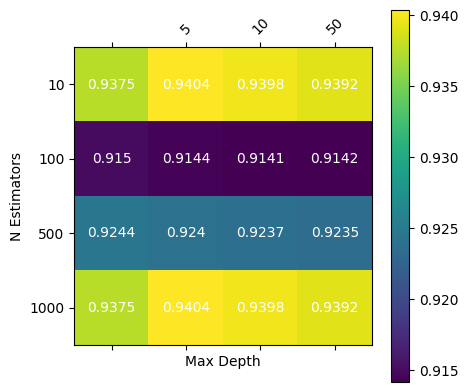

In [105]:
#Plot the score for the parameter combination in the RFC
scoresRFC = gridRFC.cv_results_['mean_test_score'].reshape(len(param_gridRFC['n_estimators']), len(param_gridRFC['max_depth']))
plt.matshow(scoresRFC)
plt.xlabel('Max Depth')
plt.ylabel('N Estimators')
plt.colorbar()
plt.xticks(np.arange(len(param_gridRFC['max_depth'])), param_gridRFC['max_depth'], rotation=45)
plt.yticks(np.arange(len(param_gridRFC['n_estimators'])), param_gridRFC['n_estimators'])
#Round all scores to 4 decimal places
scoresRFC = np.around(scoresRFC, decimals=4)
#Display score on each square
for i in range(len(param_gridRFC['n_estimators'])):
    for j in range(len(param_gridRFC['max_depth'])):        
        plt.text(j, i, scoresRFC[i, j], ha='center', va='center', color='white')
plt.show()

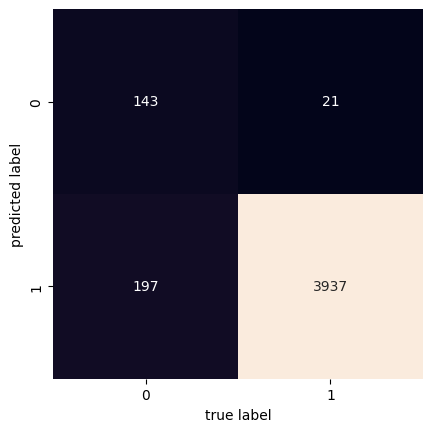

In [106]:
#Plot the confusion matrix
matRFC = confusion_matrix(te_labelsRFC, pred_rfc)
sns.heatmap(matRFC.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

[0.08608762 0.07827248 0.07683132 0.09104644 0.11015072 0.09735288
 0.09022421 0.07791741 0.09981701 0.08962411 0.1026758 ]


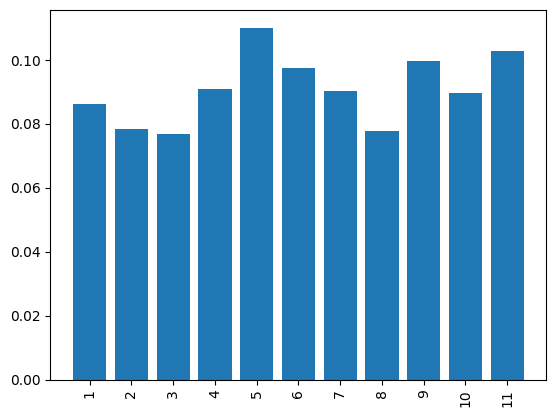

In [107]:
#List feature importances
print(gridRFC.best_estimator_.feature_importances_)
#Plot feature importances
plt.bar(range(11), gridRFC.best_estimator_.feature_importances_)
plt.xticks(range(11), useful_data.columns, rotation=90)
plt.show()

# Gradient Boosting Classifier (GBC)

In [108]:
#GradientBoostingClassifier

#Split 20% of the data for testing in both tr_data and labels
tr_dataGBC, te_dataGBC, tr_labelsGBC, te_labelsGBC = train_test_split(useful_data, labels, test_size=0.2, random_state=42)

#Create a grid of n_estimators, max_depth, and max_features
param_gridGBC = {'n_estimators': [10, 100, 500, 1000], 'max_depth': [None, 5, 10, 50]}
#Create a grid search using the GradientBoostingClassifier classifier and the grid of parameters
gridGBC = GridSearchCV(GradientBoostingClassifier(random_state=0), param_gridGBC, cv = 4, verbose=0, n_jobs=-1)
#Fit the grid search to the data
gridGBC.fit(tr_dataGBC, tr_labelsGBC)
#Print and store the best parameters, for finding testing error
print(gridGBC.best_params_)
best_paramsGBC = gridGBC.best_params_
#Print and store the best estimator, for finding testing error
print(gridGBC.best_estimator_)
#Print the scores
print(gridGBC.cv_results_['mean_test_score'])

/home/ryan/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ryan/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ryan/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ryan/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'max_depth': 10, 'n_estimators': 1000}
GradientBoostingClassifier(max_depth=10, n_estimators=1000, random_state=0)
[0.94305491 0.94160074 0.94264774 0.94264774 0.91432061 0.92717543
 0.94218241 0.9474174  0.93299209 0.95358306 0.95957422 0.96038855
 0.94305491 0.94160074 0.94264774 0.94264774]


In [109]:
#Use the best parameters and estimator to predict the testing data, and print the accuracy
pred_gbc = gridGBC.predict(te_dataGBC)
print(gridGBC.score(te_dataGBC, te_labelsGBC))

0.9748720335039553


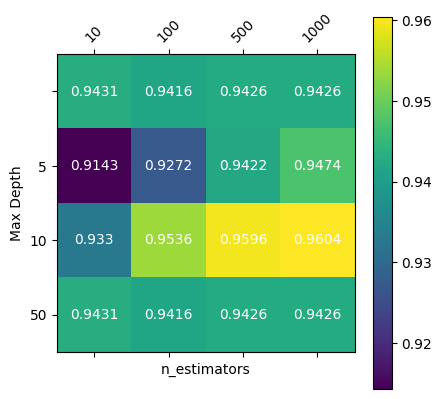

In [110]:
#Plot the score for each parameter combination
scoresGBC = gridGBC.cv_results_['mean_test_score'].reshape(len(param_gridGBC['n_estimators']), len(param_gridGBC['max_depth']))
plt.matshow(scoresGBC)
plt.xlabel('n_estimators')
plt.ylabel('Max Depth')
plt.colorbar()
plt.xticks(np.arange(len(param_gridGBC['n_estimators'])), param_gridGBC['n_estimators'], rotation=45)
plt.yticks(np.arange(len(param_gridGBC['max_depth'])), param_gridGBC['max_depth'])
#Round all scores to 4 decimal places
scoresGBC = np.around(scoresGBC, decimals=4)
#Display score on each square
for i in range(len(param_gridGBC['n_estimators'])):
    for j in range(len(param_gridGBC['max_depth'])):        
        plt.text(j, i, scoresGBC[i, j], ha='center', va='center', color='white')
plt.show()

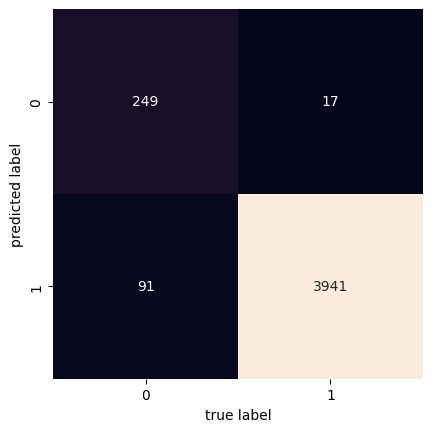

In [111]:
#Plot the confusion matrix
matGBC = confusion_matrix(te_labelsGBC, pred_gbc)
sns.heatmap(matGBC.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

# AdaBoost Classifier (ABC)

In [112]:
#AdaBoostClassifier

#Split 20% of the data for testing in both tr_data and labels
tr_dataABC, te_dataABC, tr_labelsABC, te_labelsABC = train_test_split(useful_data, labels, test_size=0.2, random_state=42)

#Create a grid of n_estimators, learning_rate, and algorithm
param_gridABC = {'n_estimators': [10, 100, 500, 1000], 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'algorithm': ['SAMME', 'SAMME.R']}
#Create a grid search using the AdaBoostClassifier classifier and the grid of parameters
gridABC = GridSearchCV(AdaBoostClassifier(random_state=0), param_gridABC, cv = 4, verbose=0, n_jobs=-1)
#Fit the grid search to the data
gridABC.fit(tr_dataABC, tr_labelsABC)
#Print and store the best parameters, for finding testing error
print(gridABC.best_params_)
best_paramsABC = gridABC.best_params_
#Print and store the best estimator, for finding testing error
print(gridABC.best_estimator_)
#Print the scores
print(gridABC.cv_results_['mean_test_score'])

/home/ryan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ryan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ryan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ryan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 1000}
AdaBoostClassifier(learning_rate=0.1, n_estimators=1000, random_state=0)
[0.91397161 0.91397161 0.91397161 0.91397161 0.91397161 0.91397161
 0.91397161 0.91397161 0.91397161 0.91397161 0.91397161 0.91397161
 0.91397161 0.91397161 0.91397161 0.91397161 0.91397161 0.91397161
 0.91397161 0.91397161 0.12278967 0.91397161 0.91397161 0.91397161
 0.12278967 0.12278967 0.12278967 0.12278967 0.91397161 0.91397161
 0.91397161 0.91397161 0.91397161 0.91397161 0.91397161 0.91397161
 0.91397161 0.91397161 0.91397161 0.91397161 0.91397161 0.91397161
 0.91397161 0.91397161 0.91397161 0.91397161 0.91397161 0.91402978
 0.91397161 0.91379711 0.91240112 0.91257562 0.13203816 0.91397161
 0.91397161 0.91397161 0.22644253 0.22644253 0.22644253 0.22644253
 0.91397161 0.91397161 0.91397161 0.91397161]


In [113]:
#Use the best parameters and estimator to predict the testing data, and print the accuracy
pred_abc = gridABC.predict(te_dataABC)
print(gridABC.score(te_dataABC, te_labelsABC))

0.9208934388087483


In [114]:
#Plot the score for each parameter combination for algorithm: SAMME
# import matplotlib.pyplot as plt
# plt.title('Algorithm: SAMME')

#Plot the score for each parameter combination for algorithm: SAMME.R
# import matplotlib.pyplot as plt
# plt.title('Algorithm: SAMME.R')


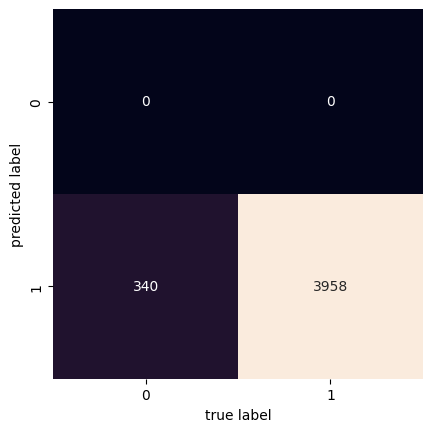

In [115]:
#Plot the confusion matrix
matABC = confusion_matrix(te_labelsABC, pred_abc)
sns.heatmap(matABC.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

# Voting Classifier (VC)

Lets create a majority voting classifier using the following classifiers:
- SVC
- LDA
- RFC
- GBC
- ABC

In [116]:
#Majority vote classifier

#Split 20% of the data for testing in both tr_data and labels
tr_dataVC, te_dataVC, tr_labelsVC, te_labelsVC = train_test_split(useful_data, labels, test_size=0.2, random_state=42)

#Initialize the classifiers
svm_clf = SVC(random_state=0)
lda_clf = LinearDiscriminantAnalysis()
rnd_clf = RandomForestClassifier(random_state=0)
gbc_clf = GradientBoostingClassifier(random_state=0)
abc_clf = AdaBoostClassifier(random_state=0)

#Create a voting classifier using the 3 classifiers
voting_clf = VotingClassifier(estimators=[('lr', lda_clf), ('rf', rnd_clf), ('svc', svm_clf), ('gbc', gbc_clf), ('abc', abc_clf)], voting='hard')
#Fit the voting classifier to the data
voting_clf.fit(tr_dataVC, tr_labelsVC)

/home/ryan/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ryan/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('lr', LinearDiscriminantAnalysis()),
                             ('rf', RandomForestClassifier(random_state=0)),
                             ('svc', SVC(random_state=0)),
                             ('gbc',
                              GradientBoostingClassifier(random_state=0)),
                             ('abc', AdaBoostClassifier(random_state=0))])

In [117]:
#Use the voting classifier to predict the testing data, and print the accuracy
voting_pred = voting_clf.predict(te_dataVC)
print(accuracy_score(te_labelsVC, voting_pred))

0.9208934388087483


In [118]:
#Print the labeled score for each model

for clf in (lda_clf, rnd_clf, svm_clf, gbc_clf, abc_clf, voting_clf):
    clf.fit(tr_dataVC, tr_labelsVC)
    y_pred = clf.predict(te_dataVC)
    print(clf.__class__.__name__, accuracy_score(te_labelsVC, y_pred))

LinearDiscriminantAnalysis 0.9208934388087483


/home/ryan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ryan/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier 0.949278734295021


/home/ryan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC 0.9208934388087483


/home/ryan/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier 0.9248487668683109


/home/ryan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier 0.9201954397394136


/home/ryan/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ryan/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier 0.9208934388087483


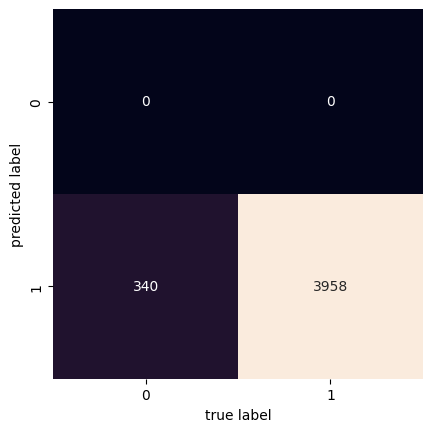

In [119]:
#Plot the confusion matrix
matVC = confusion_matrix(te_labelsVC, voting_pred)
sns.heatmap(matVC.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

# Collecting the results

In [120]:
#Printing each models training, testing error, and the best parameters 

#SVC
print('SVC')
print('Training error: ', 1 - gridSVC.best_score_)
print('Testing error: ', 1 - gridSVC.score(te_dataSVC, te_labelsSVC))
print('Best parameters: ', best_paramsSVC)

#LDA
print('LDA')
print('Training error: ', 1 - gridLDA.best_score_)
print('Testing error: ', 1 - gridLDA.score(te_dataLDA, te_labelsLDA))
print('Best parameters: ', best_paramsLDA)

#RFC
print('RFC')
print('Training error: ', 1 - gridRFC.best_score_)
print('Testing error: ', 1 - gridRFC.score(te_dataRFC, te_labelsRFC))
print('Best parameters: ', best_paramsRFC)

#GBC
print('GBC')
print('Training error: ', 1 - gridGBC.best_score_)
print('Testing error: ', 1 - gridGBC.score(te_dataGBC, te_labelsGBC))
print('Best parameters: ', best_paramsGBC)

#ABC
print('ABC')
print('Training error: ', 1 - gridABC.best_score_)
print('Testing error: ', 1 - gridABC.score(te_dataABC, te_labelsABC))
print('Best parameters: ', best_paramsABC)

#Majority vote
print('Majority vote')
print('Training error: ', 1 - voting_clf.score(tr_dataVC, tr_labelsVC))
print('Testing error: ', 1 - voting_clf.score(te_dataVC, te_labelsVC))

SVC
Training error:  0.08602838529548629
Testing error:  0.0791065611912517
Best parameters:  {'C': 0.0001, 'kernel': 'linear'}
LDA
Training error:  0.08602838529548629
Testing error:  0.0791065611912517
Best parameters:  {'priors': None, 'solver': 'svd'}
RFC
Training error:  0.0596207538389949
Testing error:  0.050721265704979035
Best parameters:  {'max_depth': None, 'n_estimators': 100}
GBC
Training error:  0.03961144718473719
Testing error:  0.02512796649604465
Best parameters:  {'max_depth': 10, 'n_estimators': 1000}
ABC
Training error:  0.08597021870637511
Testing error:  0.0791065611912517
Best parameters:  {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 1000}
Majority vote
Training error:  0.08579571893904137
Testing error:  0.0791065611912517


# Notebook Runtime

In [121]:
time_end = time.time()
print('Time to finish:', (time_end - time_start), 'seconds')

Time to finish: 349.4347743988037 seconds
